Libraries

In [1]:
library(tidyverse)
library(quanteda)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Package version: 1.4.3
Parallel computing: 2 of 4 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: ‘quanteda’

The following object is masked from ‘jupyter:irkernel’:

    View

The following object is masked from ‘package:utils’:

    View



Load the Data

In [2]:
tweets <- read_csv("../Data/English_tweets_labelled.csv")

#not enough English tweets
tweets <- filter(tweets, leader != 'Yves-François Blanchet')

#tweets <- filter(tweets, ISSUE == 1)


── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_datetime(format = ""),
  leader = col_character(),
  language = col_character(),
  tweet = col_character(),
  `NTL & GLBL LDRSP` = col_double(),
  `AFRD & ECON_INSEC` = col_double(),
  INDG = col_double(),
  `PLR, HM & IMM` = col_double(),
  `ENVIRO & ENRGY` = col_double()
)



In [3]:
head(tweets)

date,leader,language,tweet,NTL & GLBL LDRSP,AFRD & ECON_INSEC,INDG,"PLR, HM & IMM",ENVIRO & ENRGY
2019-09-10 21:18:15,Jagmeet Singh,en,"For decades now, governments in Ottawa have been working for big corporations and powerful multi-millionaires at the expense of people. In Hamilton Centre @MatthewGreenNDP is in it for you – not them. And the energy here for leadership that puts people first is huge. #elxn43 https://t.co/9A2GA4I5Yn",0,0,0,0,0
2019-09-11 00:28:54,Maxime Bernier,en,PPC Leader Maxime Bernier defends immigration polices at pre-campaign event in London https://t.co/MXptJsnyZ2,0,0,0,1,0
2019-09-11 00:59:49,Maxime Bernier,en,Party leaders Maxime Bernier and Jagmeet Singh jumpstart their campaigns in London https://t.co/kmKT4Uw24F,0,0,0,0,0
2019-09-11 01:57:02,Jagmeet Singh,en,"The stories we heard tonight in London made it clear to me that whether it's expanding health care or fixing the housing crisis, people need a government that's actually in it for them. No more catering to big corporations or the ultra-rich – we need to put people first. #elxn43 https://t.co/216tatEEhN",1,1,0,0,0
2019-09-11 03:05:23,Justin Trudeau,en,"Just spoke with @BrianPallister following today’s election in Manitoba. Congratulations again, Brian, on your re-election as Premier. https://t.co/NlnUaKJ7zV",0,0,0,0,0
2019-09-11 11:36:17,Maxime Bernier,en,"The RCMP wants to investigate the government for obstruction of justice, and the government obstructs the investigation! Only one party is bold enough to make real changes and rid Ottawa of the corruption and the crony capitalism: @peoplespca. https://t.co/pZwL7L0cso",1,0,0,0,0


Clean the data

In [4]:
#Remove Punctuation and Symbols (still keeps hashtags)
tweets.tokens <- tokens(tweets$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

#send to uppercase
tweets.tokens <- tokens_toupper(tweets.tokens)

#remove stopwords
tweets.tokens <- tokens_select(tweets.tokens, c(stopwords(), 'AMP'), selection = "remove")

#bag of words
tweets.tokens.dfm <- dfm(tweets.tokens, tolower=FALSE)

Word cloud including tweets from all leaders

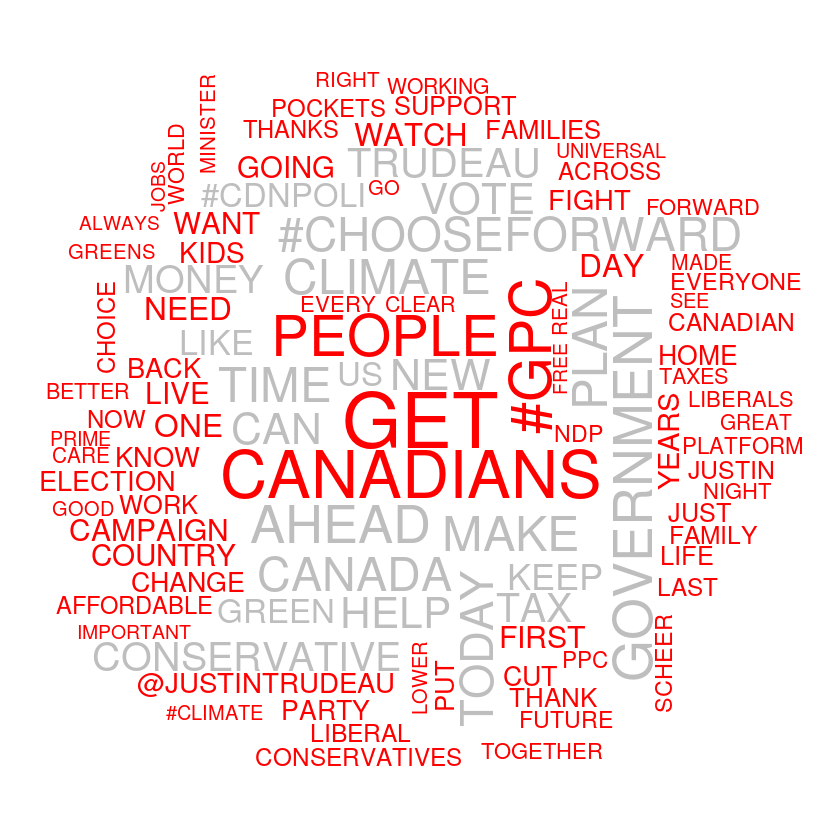

In [5]:
textplot_wordcloud(tweets.tokens.dfm, color=c("red", "gray", "red"), max_words=100)

In order to get wordclouds for each individual leader, split into 5 seperate dataframes

In [6]:
tweets.trudeau <- tweets[tweets$leader=="Justin Trudeau",]
tweets.scheer <- tweets[tweets$leader=="Andrew Scheer",]
tweets.bernier <- tweets[tweets$leader=="Maxime Bernier",]
tweets.may <- tweets[tweets$leader=="Elizabeth May",]
tweets.singh <- tweets[tweets$leader=="Jagmeet Singh",]

Clean the data

In [7]:
#Remove Punctuation and Symbols (still keeps hashtags)
tweets.trudeau.tokens <- tokens(tweets.trudeau$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

tweets.scheer.tokens <- tokens(tweets.scheer$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

tweets.bernier.tokens <- tokens(tweets.bernier$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

tweets.may.tokens <- tokens(tweets.may$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

tweets.singh.tokens <- tokens(tweets.singh$tweet, what = "word",
                        remove_numbers=TRUE, remove_punct=TRUE,
                        remove_symbols=TRUE, remove_hyphens=TRUE,
                        ngrams=1, remove_url=TRUE)

#send to uppercase
tweets.trudeau.tokens <- tokens_toupper(tweets.trudeau.tokens)
tweets.scheer.tokens <- tokens_toupper(tweets.scheer.tokens)
tweets.bernier.tokens <- tokens_toupper(tweets.bernier.tokens)
tweets.may.tokens <- tokens_toupper(tweets.may.tokens)
tweets.singh.tokens <- tokens_toupper(tweets.singh.tokens)

#remove stopwords
tweets.trudeau.tokens <- tokens_select(tweets.trudeau.tokens, c(stopwords(), 'AMP'), selection = "remove")
tweets.scheer.tokens <- tokens_select(tweets.scheer.tokens, c(stopwords(), 'AMP'), selection = "remove")
tweets.bernier.tokens <- tokens_select(tweets.bernier.tokens, c(stopwords(), 'AMP'), selection = "remove")
tweets.may.tokens <- tokens_select(tweets.may.tokens, c(stopwords(), 'AMP'), selection = "remove")
tweets.singh.tokens <- tokens_select(tweets.singh.tokens, c(stopwords(), 'AMP'), selection = "remove")

#bag of words
tweets.trudeau.tokens.dfm <- dfm(tweets.trudeau.tokens, tolower=FALSE)
tweets.scheer.tokens.dfm <- dfm(tweets.scheer.tokens, tolower=FALSE)
tweets.bernier.tokens.dfm <- dfm(tweets.bernier.tokens, tolower=FALSE)
tweets.may.tokens.dfm <- dfm(tweets.may.tokens, tolower=FALSE)
tweets.singh.tokens.dfm <- dfm(tweets.singh.tokens, tolower=FALSE)

Word plots for each leader

Warning message in wordcloud(x, min_size, max_size, min_count, max_words, color, :
“#CHOOSEFORWARD could not be fit on page. It will not be plotted.”

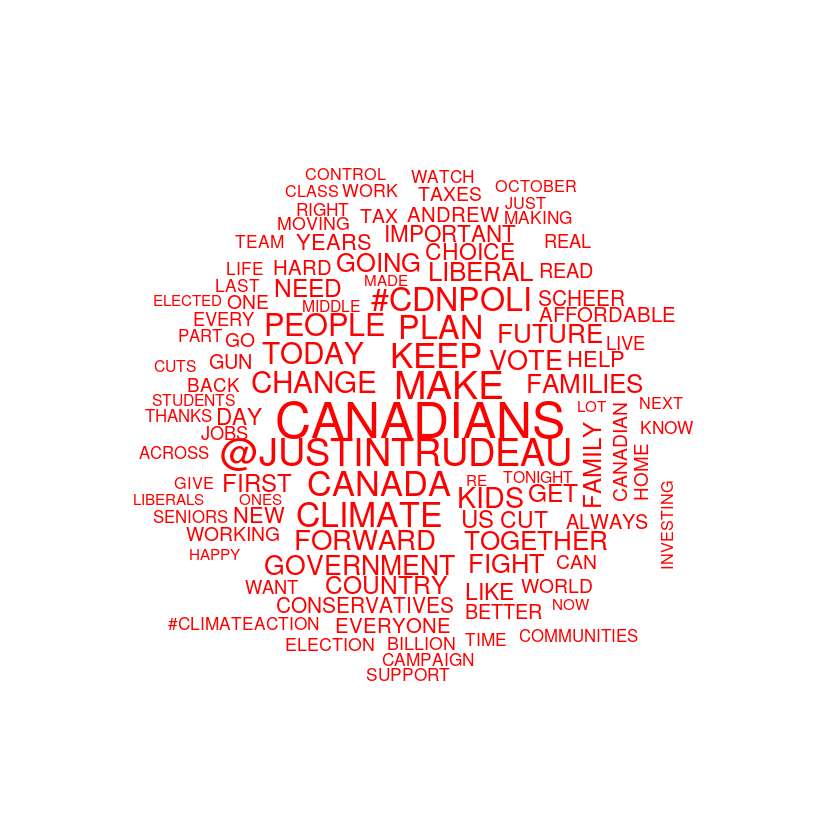

In [8]:
textplot_wordcloud(tweets.trudeau.tokens.dfm, color=c("red"), max_words=100)

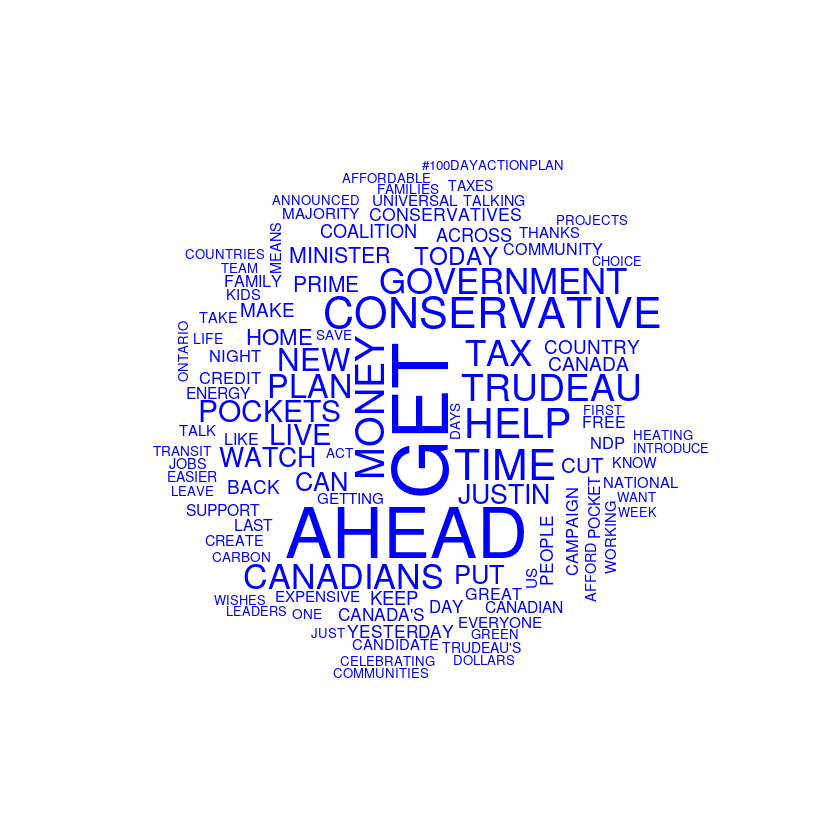

In [9]:
textplot_wordcloud(tweets.scheer.tokens.dfm, color=c("blue"), max_words=100)

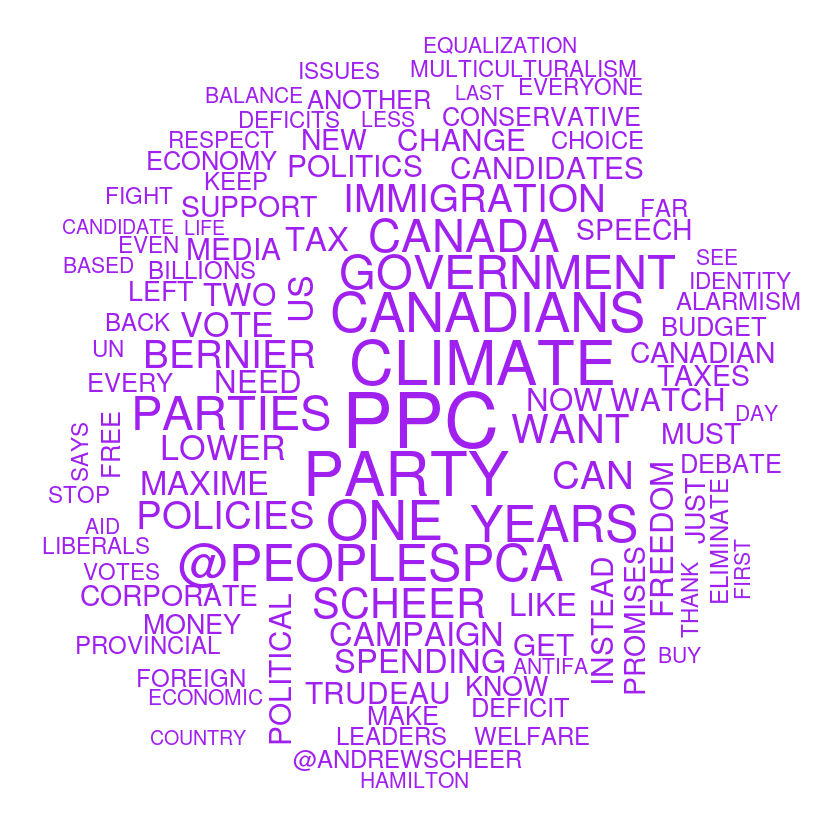

In [10]:
textplot_wordcloud(tweets.bernier.tokens.dfm, color=c("purple"), max_words=100)

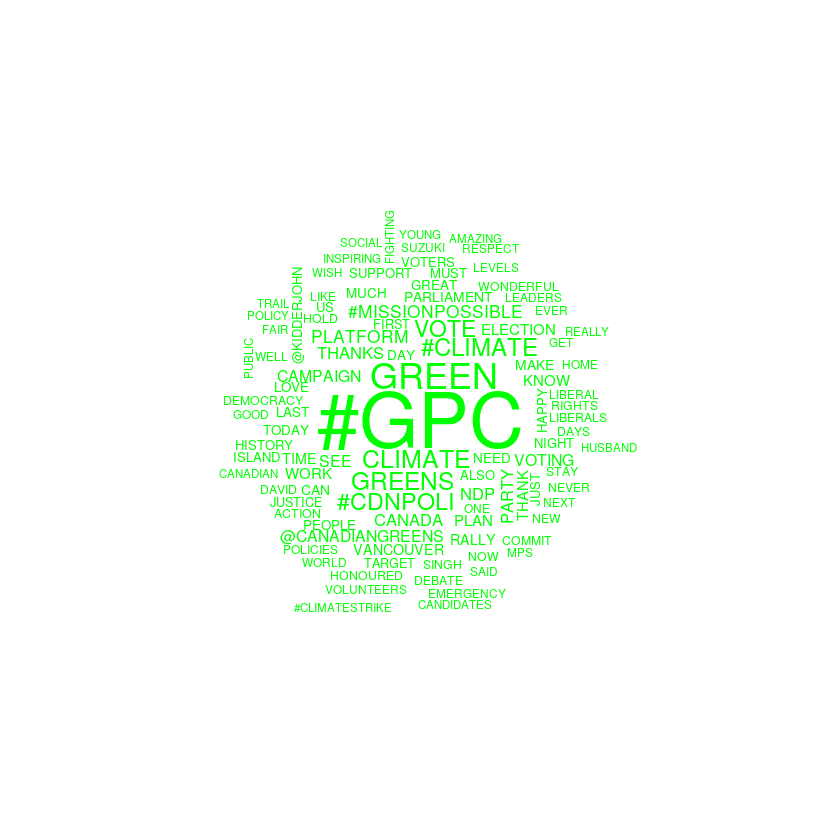

In [11]:
textplot_wordcloud(tweets.may.tokens.dfm, color=c("green"), max_words=100)

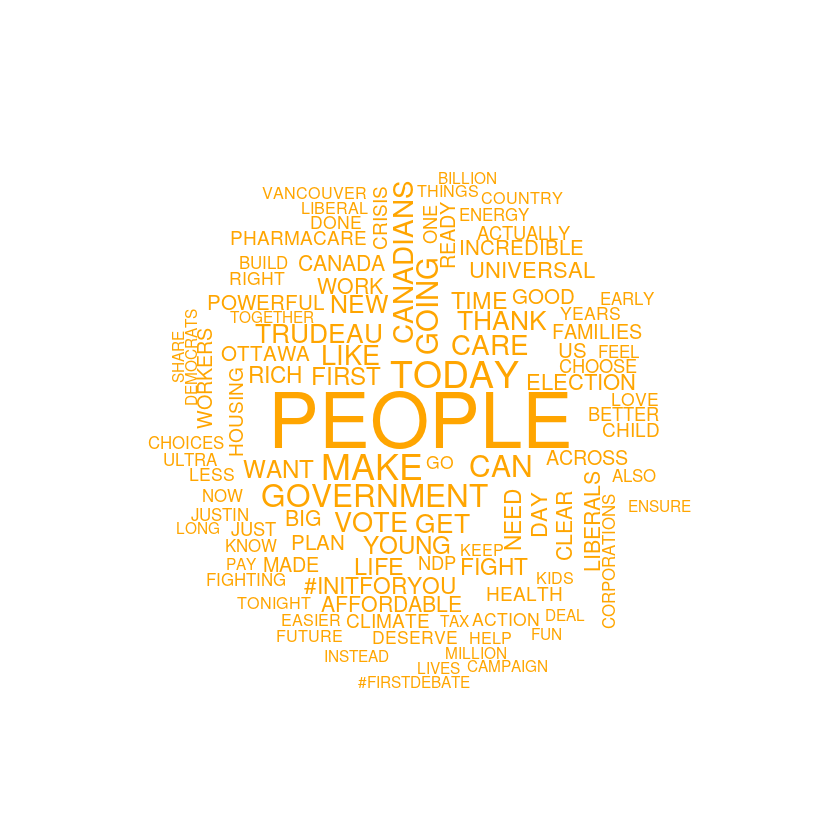

In [12]:
ss <- textplot_wordcloud(tweets.singh.tokens.dfm, color=c("orange"), max_words=100)